# Imports

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Dataset

In [0]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

len(X_test)

38

In [0]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Rede Neural

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='adam', verbose=10)

In [0]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.16201234
Iteration 2, loss = 1.14694063
Iteration 3, loss = 1.13232753
Iteration 4, loss = 1.11818314
Iteration 5, loss = 1.10441148
Iteration 6, loss = 1.09095305
Iteration 7, loss = 1.07782809
Iteration 8, loss = 1.06506511
Iteration 9, loss = 1.05276943
Iteration 10, loss = 1.04086335
Iteration 11, loss = 1.02925073
Iteration 12, loss = 1.01789410
Iteration 13, loss = 1.00680149
Iteration 14, loss = 0.99588302
Iteration 15, loss = 0.98511189
Iteration 16, loss = 0.97451371
Iteration 17, loss = 0.96409689
Iteration 18, loss = 0.95382700
Iteration 19, loss = 0.94373810
Iteration 20, loss = 0.93375187
Iteration 21, loss = 0.92390355
Iteration 22, loss = 0.91424367
Iteration 23, loss = 0.90468454
Iteration 24, loss = 0.89518118
Iteration 25, loss = 0.88571736
Iteration 26, loss = 0.87633298
Iteration 27, loss = 0.86707331
Iteration 28, loss = 0.85796804
Iteration 29, loss = 0.84895491
Iteration 30, loss = 0.83995757
Iteration 31, loss = 0.83104256
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
predictions = mlp.predict(X_test)
predictions


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

## Acuracia

In [0]:

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

## Matriz de Confusão

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]])

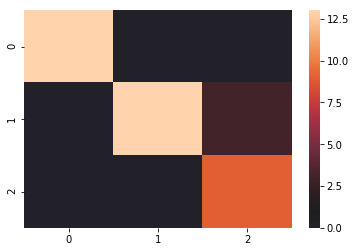

In [0]:
sns.heatmap(cm, center=True)
plt.show()

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.81      0.90        16
           2       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38



In [0]:
mlp.coefs_[0]

array([[-0.48126151, -0.43699331, -0.34736793, -0.33773779,  0.50410257,
         0.48429106,  0.18093484, -0.17601032, -0.3924409 ,  0.28890436,
        -0.60650148,  0.15072567, -0.18158802, -0.07550406, -0.16173637,
        -0.17810154,  0.26947983, -0.74470642, -0.31022773,  0.1356057 ],
       [ 0.0438415 ,  0.09933937,  0.05309406,  0.18705625,  0.3388934 ,
         0.21214835,  0.02480627, -0.80130916,  0.21121618,  0.60088148,
         0.21586209,  0.26476889, -0.00189491,  0.5422399 , -0.08124901,
         0.13622797,  0.54784265, -0.33177176, -0.51977201,  0.07002073],
       [ 0.16522159, -0.36487976,  0.44366452,  0.30477944,  0.60088713,
         0.48889891,  0.14954842,  0.18637731, -0.44165158,  0.29798026,
        -0.41693323,  0.22705155, -0.59974216, -0.47238285,  0.576906  ,
        -0.32690239, -0.46094996,  0.46107183,  0.71224007,  0.44863284],
       [-0.55616055, -0.10544109,  0.02823422,  0.02955181, -0.15473692,
        -0.36010353,  0.68920739, -0.42214404, -

In [0]:
mlp.intercepts_[0]

array([-0.19686612, -0.29664636,  0.65812975, -0.37379071,  0.23689823,
       -0.13470439, -0.39195689,  0.02520305, -0.33031081,  0.63408392,
       -0.0522206 , -0.06972875, -0.22206588, -0.32518603, -0.29839852,
       -0.0944318 , -0.15138707, -0.19507748, -0.09406567,  0.09371023])

# Testes


## Teste 1

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, alpha=0.0001, solver='adam', activation='logistic')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Acuracia: {0:.2f}%: \n".format(float(accuracy_score(y_test, y_pred)) * 100))
print("Matriz de Confusão:\n", cm)

Acuracia: 97.37%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Teste 2

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='adam', activation='relu')
mlp.fit(X_train, y_train)



y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)


Acuracia: 94.74%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Teste 3

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=400, solver='adam', activation='logistic')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Acuracia: {0:.2f}%: \n".format(float(accuracy_score(y_test, y_pred)) * 100))
print("Matriz de Confusão:\n", cm)



Acuracia: 81.58%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0  9  7]
 [ 0  0  9]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Teste 4

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='adam', activation='tanh')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

print("Acuracia: {0:.2f}%: \n".format(float(accuracy_score(y_test, y_pred)) * 100))
print("Matriz de Confusão:\n", cm)

Acuracia: 94.74%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Teste 5

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, solver='adam', activation='relu')
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

print("Acuracia: {0:.2f}%: \n".format(float(accuracy_score(y_test, y_pred)) * 100))
print("Matriz de Confusão:\n", cm)

Acuracia: 97.37%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Teste 6

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(120,120,120), max_iter=1000, solver='sgd', activation='identity')
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

print("Acuracia: {0:.2f}%: \n".format(float(accuracy_score(y_test, y_pred)) * 100))
print("Matriz de Confusão:\n", cm)

Acuracia: 97.37%: 

Matriz de Confusão:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Teste 7

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='lbfgs', verbose=10, activation='identity')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

## Teste 8

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000, solver='adam', verbose=10, activation='identity')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

Iteration 1, loss = 0.90618925
Iteration 2, loss = 0.80103430
Iteration 3, loss = 0.71299139
Iteration 4, loss = 0.64091810
Iteration 5, loss = 0.58304710
Iteration 6, loss = 0.53717031
Iteration 7, loss = 0.50084785
Iteration 8, loss = 0.47173922
Iteration 9, loss = 0.44788032
Iteration 10, loss = 0.42778195
Iteration 11, loss = 0.41038915
Iteration 12, loss = 0.39499156
Iteration 13, loss = 0.38113125
Iteration 14, loss = 0.36852186
Iteration 15, loss = 0.35698208
Iteration 16, loss = 0.34638333
Iteration 17, loss = 0.33661150
Iteration 18, loss = 0.32754361
Iteration 19, loss = 0.31904005
Iteration 20, loss = 0.31095114
Iteration 21, loss = 0.30313402
Iteration 22, loss = 0.29547209
Iteration 23, loss = 0.28788897
Iteration 24, loss = 0.28035202
Iteration 25, loss = 0.27286515
Iteration 26, loss = 0.26545463
Iteration 27, loss = 0.25815272
Iteration 28, loss = 0.25098417
Iteration 29, loss = 0.24395858
Iteration 30, loss = 0.23706977
Iteration 31, loss = 0.23030091
Iteration 32, los

0.9473684210526315

## Teste 9

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='adam', verbose=10, activation='relu', learning_rate='adaptive')
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

Iteration 1, loss = 1.01287815
Iteration 2, loss = 0.99802354
Iteration 3, loss = 0.98341442
Iteration 4, loss = 0.96900242
Iteration 5, loss = 0.95474443
Iteration 6, loss = 0.94062553
Iteration 7, loss = 0.92666526
Iteration 8, loss = 0.91286336
Iteration 9, loss = 0.89926335
Iteration 10, loss = 0.88583446
Iteration 11, loss = 0.87254442
Iteration 12, loss = 0.85939676
Iteration 13, loss = 0.84646754
Iteration 14, loss = 0.83368723
Iteration 15, loss = 0.82108252
Iteration 16, loss = 0.80868480
Iteration 17, loss = 0.79651358
Iteration 18, loss = 0.78458672
Iteration 19, loss = 0.77290923
Iteration 20, loss = 0.76149633
Iteration 21, loss = 0.75034278
Iteration 22, loss = 0.73946390
Iteration 23, loss = 0.72885240
Iteration 24, loss = 0.71851915
Iteration 25, loss = 0.70845259
Iteration 26, loss = 0.69866351
Iteration 27, loss = 0.68915905
Iteration 28, loss = 0.67989879
Iteration 29, loss = 0.67091269
Iteration 30, loss = 0.66218048
Iteration 31, loss = 0.65370438
Iteration 32, los

0.9736842105263158

## Teste 10

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000, solver='adam', verbose=10, activation='relu', learning_rate='constant')
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

Iteration 1, loss = 1.28635303
Iteration 2, loss = 1.26571706
Iteration 3, loss = 1.24573770
Iteration 4, loss = 1.22639573
Iteration 5, loss = 1.20776488
Iteration 6, loss = 1.18988199
Iteration 7, loss = 1.17265336
Iteration 8, loss = 1.15615158
Iteration 9, loss = 1.14030757
Iteration 10, loss = 1.12506525
Iteration 11, loss = 1.11042173
Iteration 12, loss = 1.09630973
Iteration 13, loss = 1.08266565
Iteration 14, loss = 1.06958211
Iteration 15, loss = 1.05686264
Iteration 16, loss = 1.04456439
Iteration 17, loss = 1.03259435
Iteration 18, loss = 1.02095801
Iteration 19, loss = 1.00964379
Iteration 20, loss = 0.99869307
Iteration 21, loss = 0.98802477
Iteration 22, loss = 0.97753345
Iteration 23, loss = 0.96720196
Iteration 24, loss = 0.95701549
Iteration 25, loss = 0.94697622
Iteration 26, loss = 0.93712330
Iteration 27, loss = 0.92745227
Iteration 28, loss = 0.91789105
Iteration 29, loss = 0.90846457
Iteration 30, loss = 0.89917728
Iteration 31, loss = 0.89003273
Iteration 32, los

0.9736842105263158